# Restricted Geometric Brownian motion

In [1]:
# Libraries ----
import re
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

sys.path.append('../modules')
import estimate_stochastic_process as esp # type: ignore
import eda_geometric_brownian_motion as edagbm # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-08-14"

## Geometric Brownian motion simulations

In [3]:
mu = 0 # Stochastic drift
sigma = 0.2 # Diffusion coefficient
x0 = 1 # Initial value
t0 = 0 # Initial time
tf = 10 # Last time
n_steps = 11 # Number of steps per simulation
n_samples = 20 # Number of simulations

In [4]:
# Geometric Brownian motion arguments list sampling ----
gbm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
gbm_args_list = gbm_args_list.values.tolist()


In [5]:
# Simulate multiple Geometric Brownian motion paths
df_gbm = esp.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = 0,
    threshold_flag = False,
    geometric_flag = True,
    bm_args_list = gbm_args_list,
    log_path = log_path,
    log_filename = "log_gbm",
    verbose = 1,
    tqdm_bar = True
)
df_gbm

100%|███████████████████████| 20/20 [00:10<00:00,  1.95it/s]


,simulation,restricted,time,value
0,1,False,0.0,1.000000
1,1,False,1.0,0.923956
2,1,False,2.0,1.014285
3,1,False,3.0,0.399151
4,1,False,4.0,0.364838
...,...,...,...,...
6,20,False,6.0,0.241434
7,20,False,7.0,0.266817
8,20,False,8.0,0.287219
9,20,False,9.0,0.264970


## Geometric Brownian motion with threshold

In [6]:
mu = 2.05 * 10**-1 # Stochastic drift
sigma = 8 * 10**-2 # Diffusion coefficient
threshold = 1 * 10**0 # Threshold value
x0 = 6 * 10**1 # Initial value
t0 = 0 * 10**0 # Initial time
tf = 4 * 10**1 # Last time
n_steps = 4 * 10 ** 3 + 1 # Number of steps per simulation
n_samples = 1 * 10 ** 5 # Number of simulations

In [7]:
# Restricted Geometric Brownian motion arguments list sampling ----
rgbm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
rgbm_args_list = rgbm_args_list.values.tolist()


In [8]:
# Simulate multiple of restricted Geometric Brownian motion paths
df_rgbm = esp.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    threshold_flag = True,
    geometric_flag = True,
    bm_args_list = rgbm_args_list,
    log_path = log_path,
    log_filename = "log_rgbm",
    verbose = 1,
    tqdm_bar = True
)
df_rgbm

100%|██████████████| 100000/100000 [05:38<00:00, 295.68it/s]


,simulation,restricted,time,value
0,1,True,0.00,60.000000
1,1,True,0.01,59.084736
2,1,True,0.02,59.574868
3,1,True,0.03,59.021149
4,1,True,0.04,58.841702
...,...,...,...,...
3996,100000,True,39.96,194073.600911
3997,100000,True,39.97,196839.702167
3998,100000,True,39.98,197232.515205
3999,100000,True,39.99,194667.151454


# Exploratory Data Analysis

In [27]:
from importlib import reload
reload(edagbm)

df_fit_rgbm = edagbm.plot_entropy_geometric_brownian_motion(
    df_gbm = df_rgbm,
    mu = mu,
    sigma = sigma,
    x0 = x0,
    t0 = t0,
    x_threshold = threshold,
    n_steps = n_steps,
    p = 1,
    ma_window = 10,
    p_norm = 1,
    significant_figures = 3,
    width = 17,
    height = 8,
    fontsize_labels = 15,
    fontsize_legend = 13,
    n_cols = 1,
    n_x_breaks = 20,
    n_y_breaks = 15,
    fancy_legend = True,
    usetex = False,
    dpi = 150,
    save_figures = True,
    output_path = output_path,
    information_name = "rgbm",
    input_generation_date = input_generation_date
)

df_fit_rgbm = df_fit_rgbm.drop_duplicates().to_csv(
    "{}/df_entropy_rgbm_{}.csv".format(output_path, re.sub("-", "", input_generation_date)),
    index = False
)

In [28]:
print("mu   ", mu)
print("sigma", sigma)
print("x0   ", x0)
print("t0   ", t0)
print("dt   ", tf/(n_steps-1))
print("xV   ", threshold)

mu    0.205
sigma 0.08
x0    60
t0    0
dt    0.01
xV    1


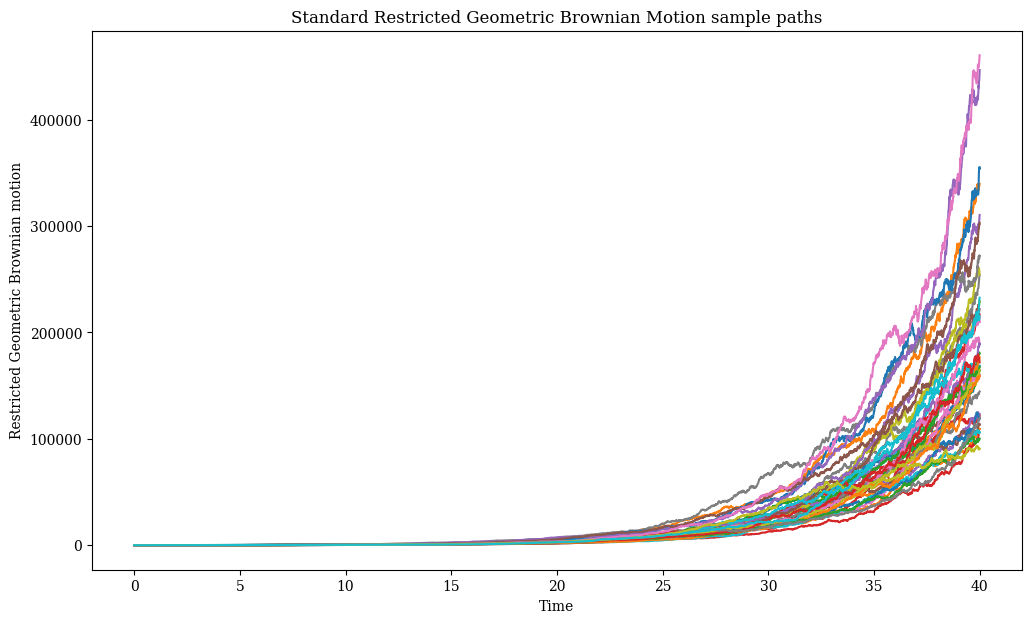

In [29]:
# Restricted Geometric Brownian motion samples ----
fig_2, ax_2 = plt.subplots(1, 1, figsize = (12, 7))

for path in range(0, 40):
    df_aux = df_rgbm[df_rgbm["simulation"] == path]
    ax_2.plot(
        df_aux["time"],
        df_aux["value"],
        alpha = 1,
        zorder = 2,
        marker = "",
        linestyle = "-",
        markersize = 1
    )
ax_2.set_title("Standard Restricted Geometric Brownian Motion sample paths")
ax_2.set_xlabel("Time")
ax_2.set_ylabel("Restricted Geometric Brownian motion")
plt.show()